# **Insper - Eletromagnetismo e Ondulatória** #


**Etapa 1 do projeto**



Diagrama do modelo eletrodinâmico do circuito WPT:

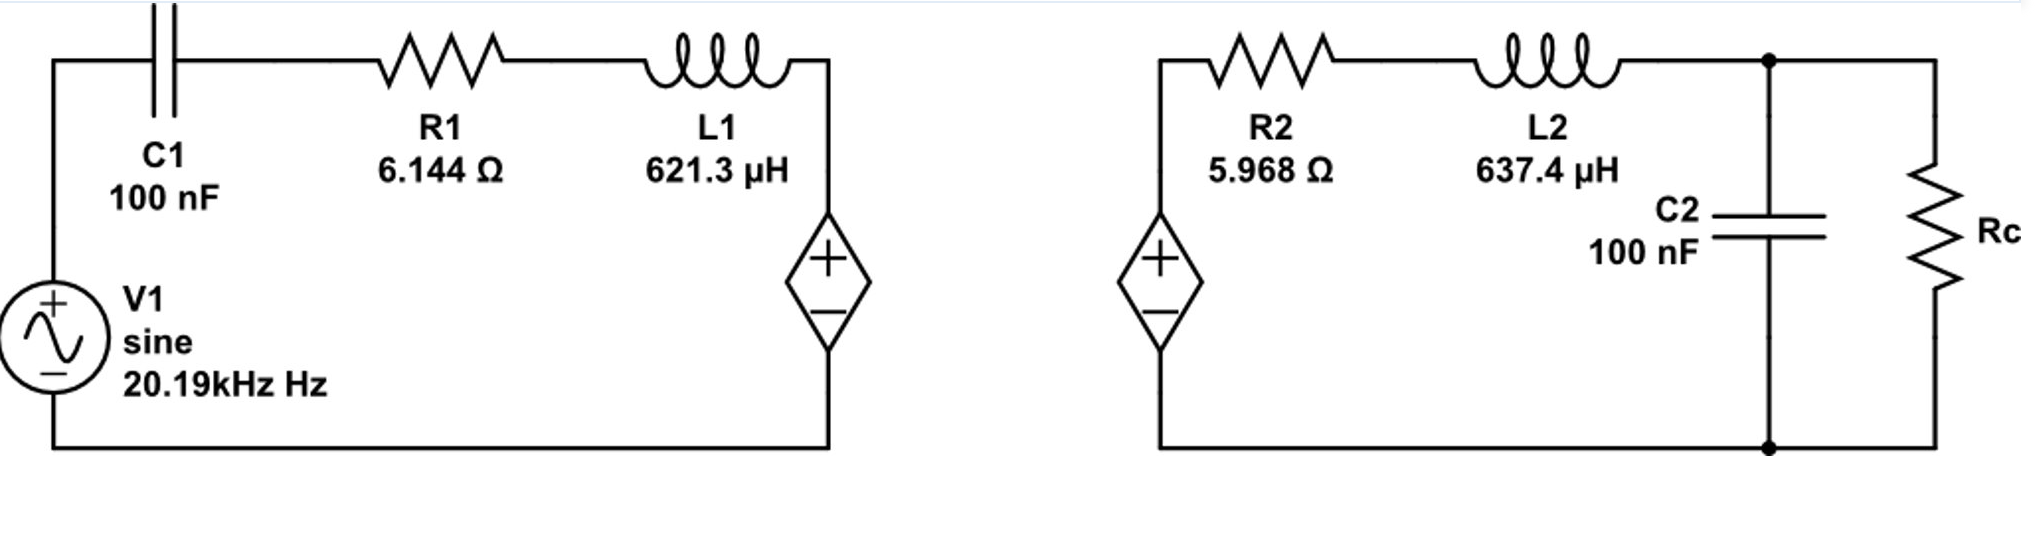

In [ ]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd

### Definindo funções básicas e parâmetros iniciais

A seguir, são declaradas as contantes adotadas para o circuito do transformador.

- As capacitâncias foram escolhidas de acordo com os capacitores disponíveis no laboratório;

- As resistências dos fios e as indudâncias das duas bobinas foram medidas.

Obs.
Os valores das resistências foram ajustados ao longo do desenvolvimento da etapa 2, considerando que o circuito demonstrou possuir maior resistividade devido, possivelmente, às protoboards e jumpers usados.

In [ ]:
#indutâncias
L1=621.3e-6
L2=637.4e-6

#capacitâncias
C1=0.1e-6
C2=0.1e-6

#resistências
R1=1.536*4
R2=1.492*4
Rc=10

O valor de pico adotado para a sumulação e para o circuto foi de 15V.

**Atualização do modelo (Etapa 2)**

Considerando que a tensão trabalhada, na etapa 2, na entrada da bobina primária é uma tensão quadrada, foi feita a alteração na amplitude da função senoidal `U`, como indicado.



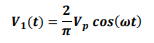

In [ ]:
#tensão da fonte (pico)
U=15 #valor eficaz

Uf = (2/pi)*U

In [ ]:
#Cálculo da frequência angular e frequência de ressonância

f0 = 1/(2*pi*sqrt(L1*C1))
w0 = 2*pi*f0

print("Frequência de ressonância: ", f0)
print("Frequência angular: ", w0)

Frequência de ressonância:  20191.54051963353
Frequência angular:  126867.19072228267


A função a seguir retorna as reatâncias para dadas frequência e constante de acoplamento

In [ ]:
def calculaReatancias(k, f):
    w = 2*pi*f

    # Indutância Mútua
    M=k*sqrt(L1*L2)

    # Reatâncias indutivas de  𝐿1  e  𝐿2
    XL1=1j*w*L1
    XL2=1j*w*L2

    # Reatâncias capactitivas de  𝐿1  e  𝐿2
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)

    # Reatância indutiva mútua
    XM=1j*w*M

    return M, XC1, XC2, XL1, XL2, XM

**Função do transformador**

Adaptada de modo que para dada frequência, seja possível retornar as frequências no primário e no secundário, além da tensão V2.

In [ ]:
def CalcularTransformador(V, Rc, f, k):

    V=np.array([Uf,0])

    M, XC1, XC2, XL1, XL2, XM = calculaReatancias(k, f)

    Zeq1 = R1 + XC1 + XL1
    Zeq2 = R2 + XL2 + ((XC2*Rc)/(XC2+Rc))

    Zcr = ((XC2*Rc)/(XC2+Rc))

    Z=np.array([[Zeq1, -XM],[-XM, Zeq2]])
    I=np.dot(linalg.inv(Z),V)

    V2=Zcr*I[1]

    Ic = V2/Rc

    return I[0], I[1], V2, Ic

### Análide de corrente, potência e eficiência de acordo com a variação da frequência

Nesta etapa, a análise será feita tendo em mente um k fixo e depois comparando a mudança do k.

Valor máximo da corrente no primário: 1.174 A. Na frequência de 21606.606606606605 Hz
Valor máximo da corrente no secundário: 0.417 A. Na frequência de 21606.606606606605 Hz


Valor máximo de eficiência: 15.229%. Na frequência de 24484.484484484485 Hz




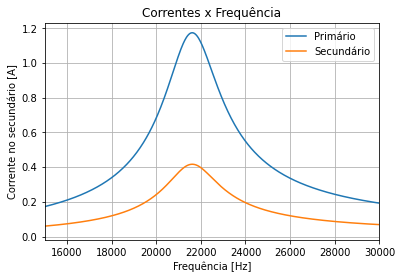

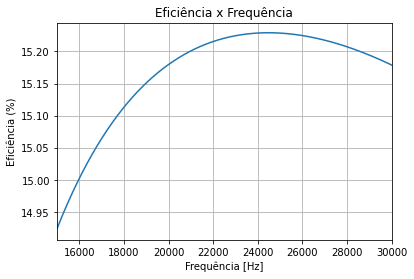

In [ ]:
# lista de frequências
f_range = np.linspace(15000,40000,1000)

#Lista de correntes

lista_I1 = []
lista_I2 = []

#lista de tensões no secundário
lista_V2 = []

#listas com potências no primário e da carga no secundário:
lista_p1 = []
lista_pc = []

#lista de eficiências obtidas
lista_ef = []

V1 = Uf
lista_pc = []

k = 0.36

for f in f_range:
    I1, I2, V2, Ic = CalcularTransformador(V1, Rc, f, k)

    lista_I1.append(abs(I1))
    lista_I2.append(abs(I2))

    lista_V2.append(abs(V2))

    # Calculando valores eficazes para calcular a potência
    I1ef = I1/sqrt(2)
    Icef = Ic/sqrt(2)
    V1ef = V1/sqrt(2)
    V2ef = V2/sqrt(2)

    P1 = (V1ef*I1ef.conjugate()).real
    Pc = (V2ef*Icef.conjugate()).real

    lista_p1.append(P1)
    lista_pc.append(Pc)

    ef = (abs(Pc/P1))*100
    lista_ef.append(ef)


I1max = max(lista_I1)
I2max = max(lista_I2)

f_I1max = f_range[lista_I1.index(I1max)]
f_I2max = f_range[lista_I2.index(I2max)]

P1max = max(lista_p1)
Pcmax = max(lista_pc)
f_p1max = f_range[lista_p1.index(P1max)]
f_pcmax = f_range[lista_pc.index(Pcmax)]

V2max = max(lista_V2)
f_V2max = f_range[lista_V2.index(V2max)]

efmax = max(lista_ef[1:])
f_efmax = f_range[lista_ef.index(efmax)]

print(f"Valor máximo da corrente no primário: {abs(I1max):.3f} A. Na frequência de {abs(f_I1max)} Hz")
print(f"Valor máximo da corrente no secundário: {abs(I2max):.3f} A. Na frequência de {abs(f_I2max)} Hz")
print("\n")
print(f"Valor máximo de eficiência: {abs(efmax):.3f}%. Na frequência de {abs(f_efmax)} Hz")
print("\n")

plt.figure(1)
plt.plot(f_range, lista_I1, label = "Primário")
plt.legend()
plt.xlabel("Frequência [Hz]")
plt.ylabel("Corrente no primário [A]")
plt.title("Correntes x Frequência")
plt.grid(True)

plt.figure(1)
plt.plot(f_range, lista_I2, label = "Secundário")
plt.legend()
plt.xlabel("Frequência [Hz]")
plt.ylabel("Corrente no secundário [A]")
xmin, xmax = plt. xlim(15000, 30000)
plt.grid(True)

plt.figure(2)
plt.plot(f_range, lista_ef)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Eficiência (%)")
xmin, xmax = plt. xlim(15000, 30000)
plt.title("Eficiência x Frequência")
plt.grid(True)

plt.show()

Vamos utilizar o nosso k ótimo que foi encontrado.

In [ ]:
def compara_k(k):
  # lista de frequências
  f_range = np.linspace(15000,40000,1000)

  #Lista de correntes

  lista_I1 = []
  lista_I2 = []

  #lista de tensões no secundário
  lista_V2 = []

  #listas com potências no primário e da carga no secundário:
  lista_p1 = []
  lista_pc = []

  #lista de eficiências obtidas
  lista_ef = []

  V1 = Uf
  lista_pc = []

  for f in f_range:
      I1, I2, V2, Ic = CalcularTransformador(V1, Rc, f, k)

      lista_I1.append(abs(I1))
      lista_I2.append(abs(I2))

      lista_V2.append(abs(V2))

      # Calculando valores eficazes para calcular a potência
      I1ef = I1/sqrt(2)
      Icef = Ic/sqrt(2)
      V1ef = V1/sqrt(2)
      V2ef = V2/sqrt(2)

      P1 = (V1ef*I1ef.conjugate()).real
      Pc = (V2ef*Icef.conjugate()).real

      lista_p1.append(P1)
      lista_pc.append(Pc)

      ef = (abs(Pc/P1))*100
      lista_ef.append(ef)


  I1max = max(lista_I1)
  I2max = max(lista_I2)

  f_I1max = f_range[lista_I1.index(I1max)]
  f_I2max = f_range[lista_I2.index(I2max)]

  P1max = max(lista_p1)
  Pcmax = max(lista_pc)
  f_p1max = f_range[lista_p1.index(P1max)]
  f_pcmax = f_range[lista_pc.index(Pcmax)]

  V2max = max(lista_V2)
  f_V2max = f_range[lista_V2.index(V2max)]

  efmax = max(lista_ef[1:])
  f_efmax = f_range[lista_ef.index(efmax)]

  print(f"Valor máximo da corrente no primário: {abs(I1max):.3f} A. Na frequência de {abs(f_I1max)} Hz")
  print(f"Valor máximo da corrente no secundário: {abs(I2max):.3f} A. Na frequência de {abs(f_I2max)} Hz")
  print("\n")
  print(f"Valor máximo de eficiência: {abs(efmax):.3f}%. Na frequência de {abs(f_efmax)} Hz")
  print("\n")

  plt.figure(1)
  plt.plot(f_range, lista_I1, label = "Primário")
  plt.legend()
  plt.xlabel("Frequência [Hz]")
  plt.ylabel("Corrente no primário [A]")
  plt.title("Correntes x Frequência")
  plt.grid(True)

  plt.figure(1)
  plt.plot(f_range, lista_I2, label = "Secundário")
  plt.legend()
  plt.xlabel("Frequência [Hz]")
  plt.ylabel("Corrente no secundário [A]")
  xmin, xmax = plt. xlim(15000, 40000)
  plt.grid(True)

  plt.figure(2)
  plt.plot(f_range, lista_ef)
  plt.xlabel("Frequência [Hz]")
  plt.ylabel("Eficiência (%)")
  xmin, xmax = plt. xlim(15000, 40000)
  plt.title("Eficiência x Frequência")
  plt.grid(True)

  plt.show()

É possivel observar que a frequência para a qual as correntes são máximas é
coincidente com a frequência de ressonância.

Valor máximo da corrente no primário: 0.675 A. Na frequência de 29039.03903903904 Hz
Valor máximo da corrente no secundário: 0.483 A. Na frequência de 29064.064064064063 Hz


Valor máximo de eficiência: 35.100%. Na frequência de 22807.80780780781 Hz




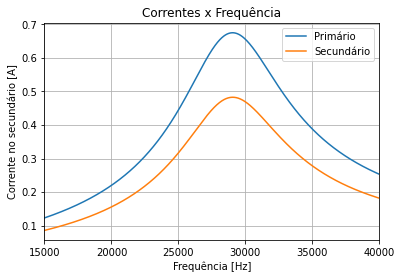

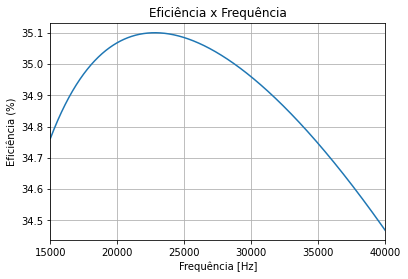

In [ ]:
compara_k(0.72)

Ao dobrar o k, podemos perceber que a frequência para qual as correntes são máximas aumentam.

Valor máximo da tensão V2: 4.130 V. Na frequência de 21606.606606606605 Hz


Valor máximo da potência da fonte (P1): 5.606 W. Na frequência de 21606.606606606605 Hz
Valor máximo da potência na carga (Pc): 0.853 W. Na frequência de 21606.606606606605 Hz




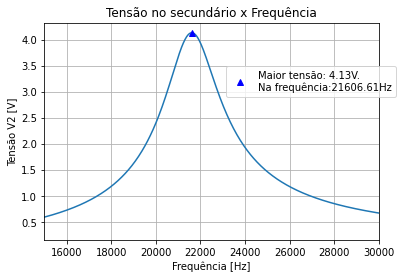

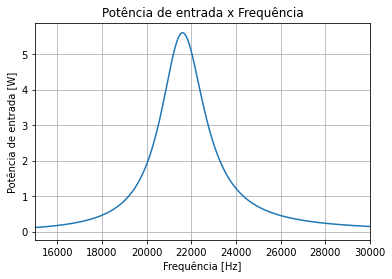

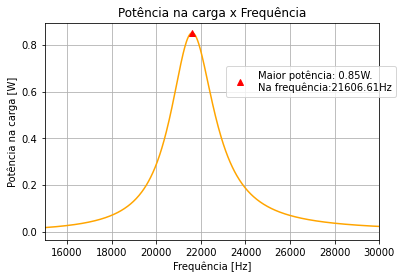

In [ ]:
print(f"Valor máximo da tensão V2: {abs(V2max):.3f} V. Na frequência de {abs(f_V2max)} Hz")
print("\n")
print(f"Valor máximo da potência da fonte (P1): {abs(P1max):.3f} W. Na frequência de {abs(f_p1max)} Hz")
print(f"Valor máximo da potência na carga (Pc): {abs(Pcmax):.3f} W. Na frequência de {abs(f_pcmax)} Hz")
print("\n")

plt.figure(1)
plt.plot(f_range, lista_V2)
plt.plot(f_V2max,V2max,'b^', label = f"Maior tensão: {abs(V2max):.2f}V.\nNa frequência:{abs(f_V2max):.2f}Hz")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Tensão V2 [V]")
plt.title("Tensão no secundário x Frequência")
xmin, xmax = plt. xlim(15000, 30000)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.grid(True)

plt.figure(2)
plt.plot(f_range, lista_p1)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Potência de entrada [W]")
plt.title("Potência de entrada x Frequência")
xmin, xmax = plt. xlim(15000, 30000)
plt.grid(True)

plt.figure(3)
plt.plot(f_range, lista_pc, 'orange')
plt.plot(f_pcmax,Pcmax,'r^', label = f"Maior potência: {abs(Pcmax):.2f}W.\nNa frequência:{abs(f_pcmax):.2f}Hz")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Potência na carga [W]")
plt.title("Potência na carga x Frequência")
xmin, xmax = plt. xlim(15000, 30000)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.grid(True)

plt.show()

Comportamento dos picos de potências reais e correntes nos circuitos primário e secundário conforme se varia k.

In [ ]:
lista_k1 = np.linspace(0.05, 0.75, 8)

def plotaKs(v1, Rc):
    for k in lista_k1:
        # Listas que auxiliarão no plot
        S_lista = [] # Potência da fonte
        Sc_lista = [] # Potência da carga

        i1_lista = []
        i2_lista = []

        v2_lista = []
        efic_lista = []

        for f in f_range:
            I1, I2, V2, Ic = CalcularTransformador(V1, Rc, f, k)

            # Calculando valores eficazes para calcular a potência
            I1ef = I1/sqrt(2)
            Icef = Ic/sqrt(2)
            V1ef = V1/sqrt(2)
            V2ef = V2/sqrt(2)

            i1_lista.append(abs(I1))
            i2_lista.append(abs(I2))
            v2_lista.append(abs(V2))

            pot_saida = (V2ef*Icef.conjugate()).real
            Sc_lista.append(pot_saida)

            pot_entrada = (V1ef*I1ef.conjugate()).real
            S_lista.append(pot_entrada)

            ef = (pot_saida/pot_entrada)*100
            efic_lista.append(ef)

        plt.figure(1)
        plt.plot(f_range, Sc_lista, label = "k = {0}".format(k.round(3)))
        plt.xlabel("Frequência $f$")
        plt.ylabel("Potência real de saída")
        plt.title("Potência real de saída x Frequência")
        plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
        plt.grid(True)

        plt.figure(2)
        plt.plot(f_range, S_lista, label = "k = {0}".format(k.round(3)))
        plt.xlabel("Frequência $f$")
        plt.ylabel("Potência real de entrada")
        plt.title("Potência real de entrada x Frequência")
        plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
        plt.grid(True)

        plt.figure(3)
        plt.plot(f_range, efic_lista, label = "k = {0}".format(k.round(3)))
        plt.xlabel("Frequência $f$")
        plt.ylabel("Eficiência %")
        plt.title("Eficiência x Frequência")
        plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
        plt.grid(True)

        plt.figure(4)
        plt.plot(f_range, i1_lista, label = "k = {0}".format(k.round(3)))
        plt.xlabel("Frequência $f$")
        plt.ylabel("Corrente $I_1$ [A]")
        plt.title("Corrente primário x Frequência")
        plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
        plt.grid(True)

        plt.figure(5)
        plt.plot(f_range, i2_lista, label = "k = {0}".format(k.round(3)))
        plt.xlabel("Frequência $f$")
        plt.ylabel("Corrente $I_2$ [A]")
        plt.title("Corrente secundário x Frequência")
        plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
        plt.grid(True)

    plt.show()

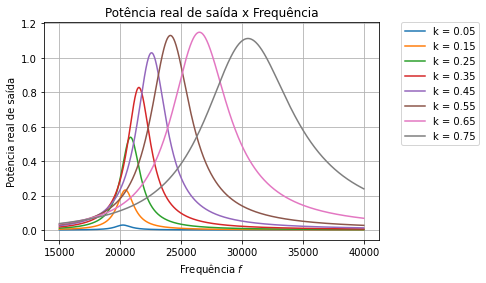

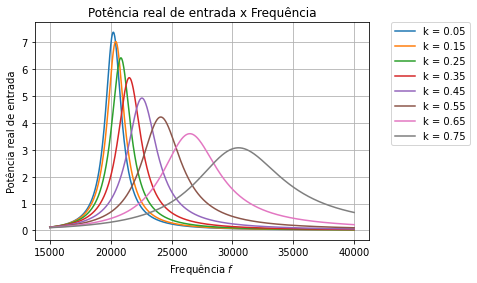

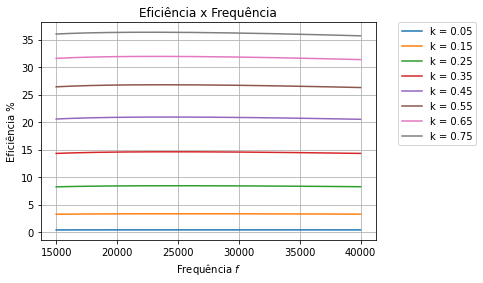

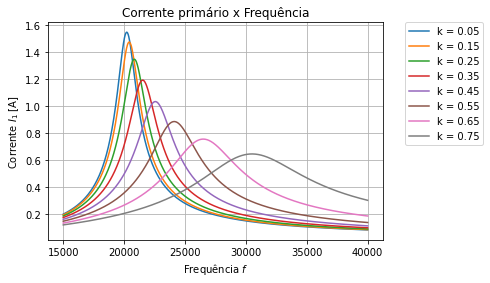

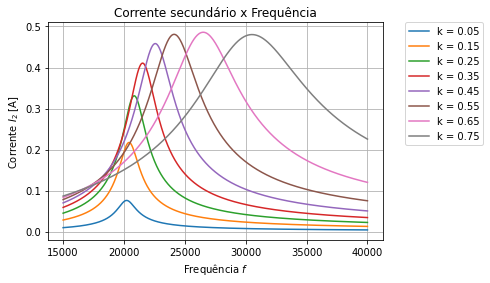

In [ ]:
plotaKs(V1, Rc)

A seguir, são plotados os gráficos de potência e tensão no secundário em função do coeficiente de acoplamento

Coeficiente de acoplamento ótimo para 21290.0 Hz:
0.3539

Maior tensão medida é aproximadamente:
3.989



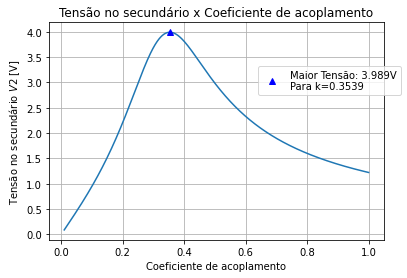

In [ ]:
vp2_lista = []
Ps_lista = []
lista_k2 = np.linspace(0.01, 1, 1000)

for k in lista_k2:
    f = 21.29e3
    I1, I2, V2, Ic = CalcularTransformador(V1, Rc, f, k)
    vp2_lista.append(abs(V2))

    # Calculando valores eficazes para calcular a potência
    Icef = Ic/sqrt(2)
    V2ef = V2/sqrt(2)

    P_saida = (V2ef*Icef.conjugate()).real
    Ps_lista.append(P_saida)


Psmax = max(Ps_lista)
k_otimo = lista_k2[Ps_lista.index(Psmax)]
print(f"Coeficiente de acoplamento ótimo para {f} Hz:\n{k_otimo.round(4)}")
print(f'\nMaior tensão medida é aproximadamente:\n{max(vp2_lista).round(3)}\n')

plt.figure()
plt.plot(lista_k2, vp2_lista)
plt.plot(k_otimo,max(vp2_lista),'b^', label = f"Maior Tensão: {max(vp2_lista).round(3)}V\nPara k={k_otimo.round(4)}")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão no secundário $V2$ [V]")
plt.title("Tensão no secundário x Coeficiente de acoplamento")
plt.grid(True)

0.7955232025109658


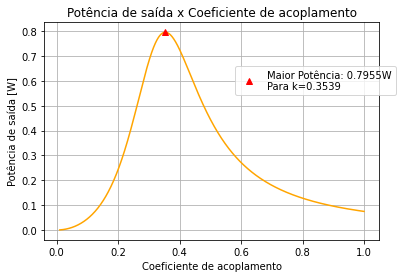

In [ ]:
print(f'{max(Ps_lista)}')

plt.figure()
plt.plot(lista_k2, Ps_lista, 'orange')
plt.plot(k_otimo,max(Ps_lista),'r^', label = f"Maior Potência: {max(Ps_lista).round(4)}W\nPara k={k_otimo.round(4)}")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Potência de saída [W]")
plt.title("Potência de saída x Coeficiente de acoplamento")
plt.grid(True)

plt.show()

O próximo passo foi inserir dados medidos e plotá-los de modo a comparar com os resultados da simulação.

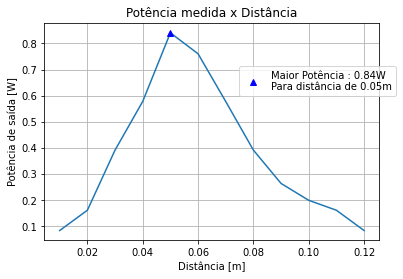

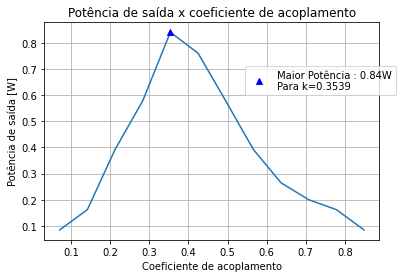

In [ ]:
dist = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12]
v2_medido = [1.3, 1.8, 2.8, 3.4, 4.1, 3.9, 3.4, 2.8, 2.3, 2, 1.8,  1.3]

lista_k3 = []

P_medida = []

for i in range(len(v2_medido)):
  v2m_ef = v2_medido[i]/sqrt(2)
  P = (v2m_ef**2)/Rc
  P_medida.append(P)

  k_m = (dist[i]*k_otimo)/0.05
  lista_k3.append(k_m)

Pm_max = max(P_medida)
d = dist[P_medida.index((Pm_max))]


plt.figure()
plt.plot(dist, P_medida)
plt.xlabel("Distância [m]")
plt.ylabel("Potência de saída [W]")
plt.title("Potência medida x Distância")
plt.plot(d,max(P_medida),'b^', label = f"Maior Potência : {Pm_max:.2f}W\nPara distância de {d}m")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.grid(True)

plt.figure()
plt.plot(lista_k3, P_medida,)
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Potência de saída [W]")
plt.title("Potência de saída x coeficiente de acoplamento")
plt.plot(k_otimo,max(P_medida),'b^', label = f"Maior Potência : {Pm_max:.2f}W\nPara k={k_otimo.round(4)}")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.grid(True)



In [ ]:
Pm_max

0.8404999999999998

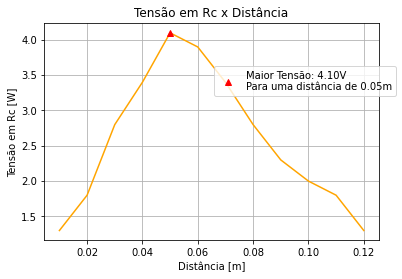

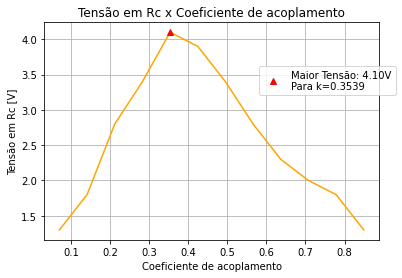

In [ ]:
plt.figure()
plt.plot(dist, v2_medido, 'orange')
plt.xlabel("Distância [m]")
plt.ylabel("Tensão em Rc [W]")
plt.title("Tensão em Rc x Distância")
plt.plot(d,max(v2_medido),'r^', label = f"Maior Tensão: {max(v2_medido):.2f}V\nPara uma distância de {d}m")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.grid(True)

plt.figure()
plt.plot(lista_k3, v2_medido, 'orange')
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão em Rc [V]")
plt.title("Tensão em Rc x Coeficiente de acoplamento")
plt.plot(k_otimo,max(v2_medido),'r^', label = f"Maior Tensão: {max(v2_medido):.2f}V\nPara k={k_otimo.round(4)}")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper right', borderaxespad=0)
plt.grid(True)

Mostrando que, uma vez atingido o k ótimo, conforme se distanciou as bobinas, o coeficiente de acoplamento diminuiu.
Comportamento do gráfico apresentu-se linear devido à pequena quantidade de pontos.

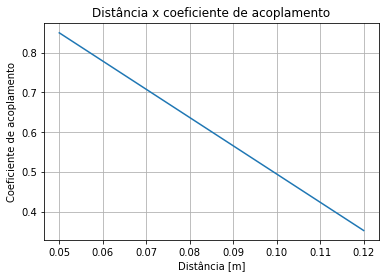

In [ ]:
plt.figure()
plt.plot(dist[4:],list(reversed(lista_k3[4:])))
plt.xlabel("Distância [m]")
plt.ylabel("Coeficiente de acoplamento")
plt.title("Distância x coeficiente de acoplamento")
plt.grid(True)